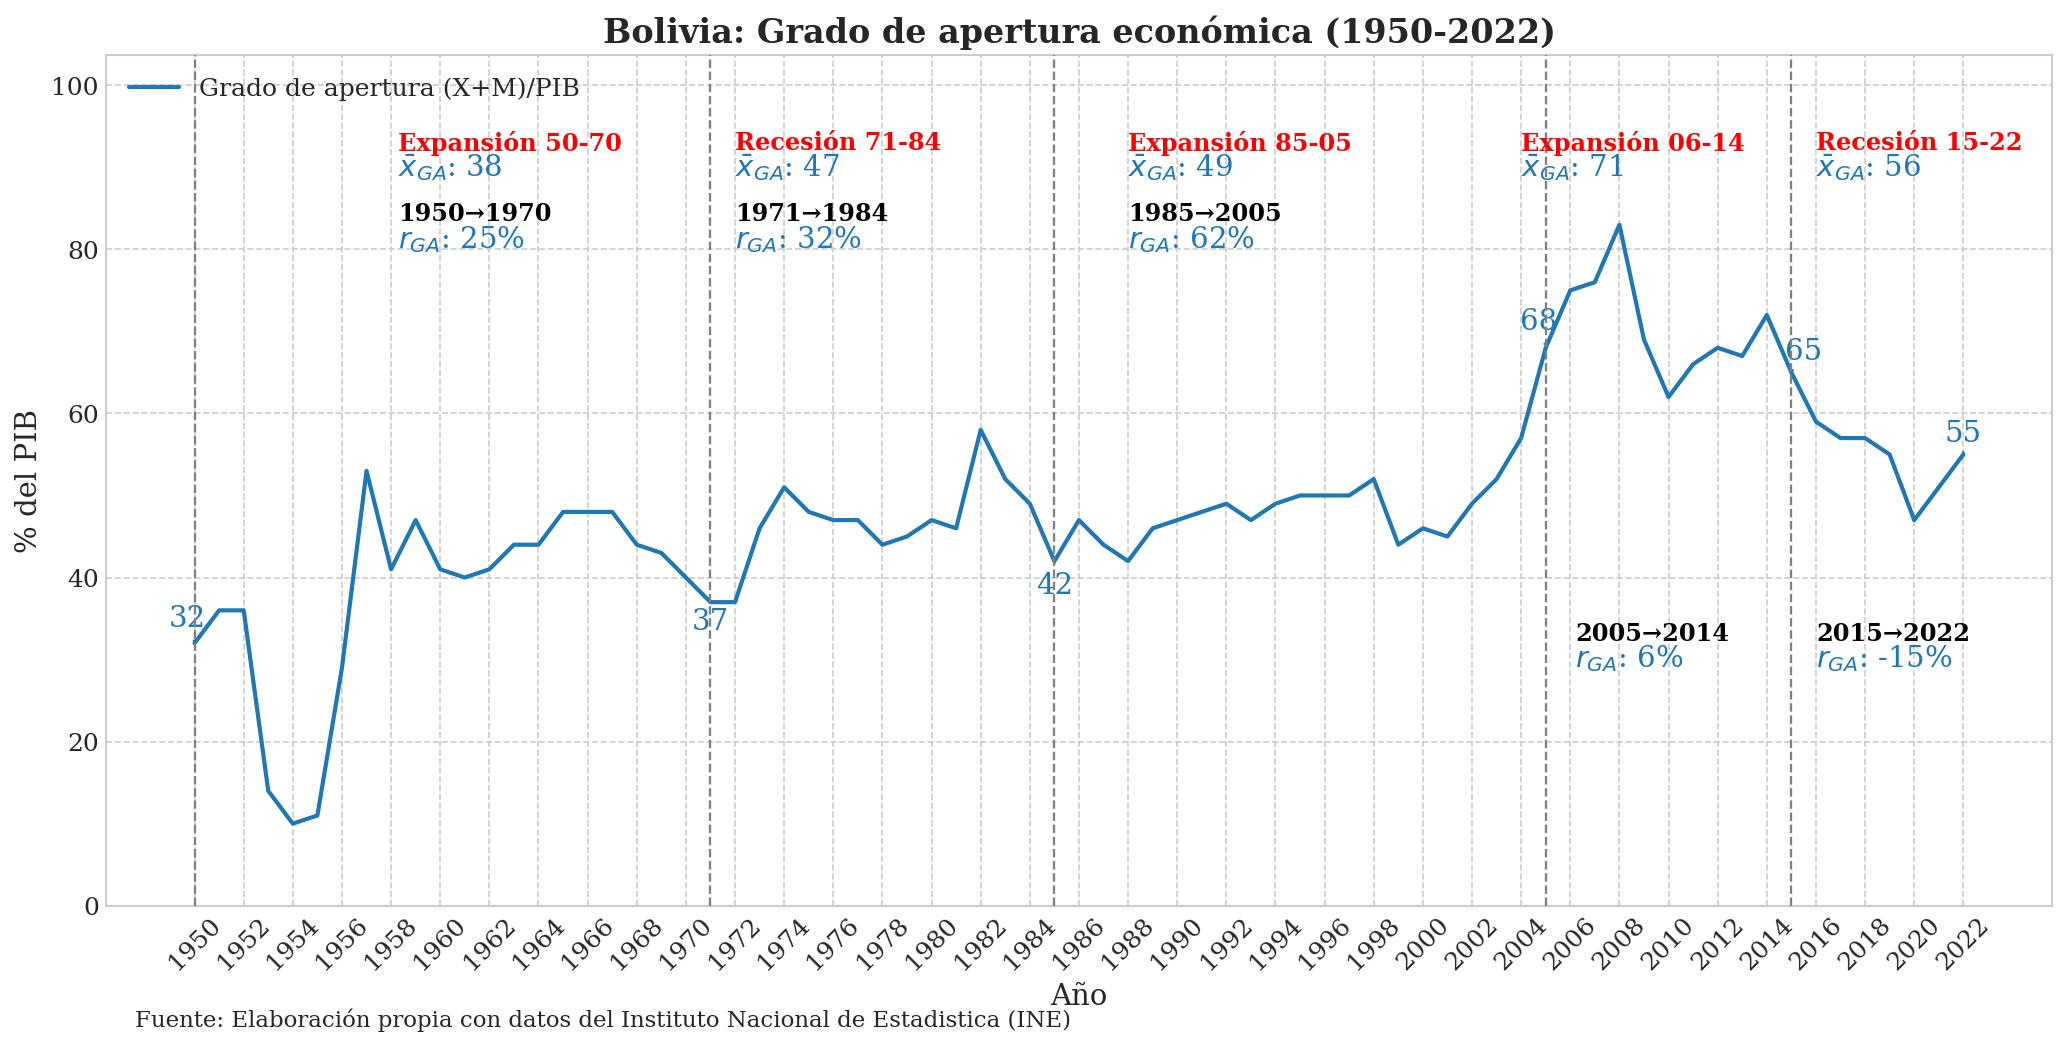

In [2]:
# ─────────────────── Grado de Apertura Económica 1950-2022 ───────────────────
import pandas as pd
import sys
import matplotlib.pyplot as plt
import sqlite3, os
sys.path.append(os.path.abspath('../'))
from graficos_utils import *


periods = {
    "Expansión 50-70":   slice(1950, 1970),
    "Recesión 71-84":    slice(1971, 1984),
    "Expansión 85-05":   slice(1985, 2005),
    "Expansión 06-14": slice(2006, 2014),
    "Recesión 15-22":    slice(2015, 2022),
}

# ── 1. Configuración general de la figura y salida ───────────────────────────
output_dir = "../../../assets/tesis/serie_completa"
os.makedirs(output_dir, exist_ok=True)


set_style()

# ── 2. Carga de tabla grado_de_apertura ──────────────────────────────────────
db_path = '../../../db/proyectomacro.db'
query   = "SELECT * FROM grado_de_apertura"        # columnas: año, grado
with sqlite3.connect(db_path) as conn:
    df = pd.read_sql(query, conn, index_col='año')

df.sort_index(inplace=True)        # asegura orden cronológico
df.rename(columns={'grado': 'GA'}, inplace=True)   # más corto



# ── 3. Estadísticas por ciclo (medias) ───────────────────────────────────────
cycle_stats = {
    name: df.loc[period].mean().to_dict()
    for name, period in periods.items()
}
component_colors = {
    'GA': '#1f77b4'
}

# ── 4. Líneas verticales de hitos (mismos años que el gráfico de PIB) ───────
hitos_v = {
    1950: "Expansion",
    1971: "Recesion",
    1985: "Expansion",
    2005: "Expansion",
    2015: "Recesion"
}
annotation_offsets = {
    "GA": {
        1950: (-0.3,  3.0),
        1971: ( 0,  -2.3),
        1985: (0,  -3.0),
        2005: ( -0.3,  3.2),
        2015: (0.5,  2.5),
        2022: ( 0,  2.5),
    }
}

hitos_offset = {
    1950: 0.92, 1971: 0.50, 1985: 0.50,
    2005: 0.92, 2015: 0.50, 2022: 0.92,
}

tasas_offsets = {
    "1950-1970": (1958.3, 0.99),
    "1971-1984": (1972, 0.99),
    "1985-2005": (1988, 0.99),
    "2005-2014": (2006.2, 0.4),
    "2015-2022": (2016, 0.4),
}
means_offsets = {
    "Expansión 50-70": (1958.3,  1.09),
    "Recesión 71-84":  (1972, 1.09),
    "Expansión 85-05": (1988, 1.09),
    "Expansión 06-14": (2004,  1.09),
    "Recesión 15-22":  (2016,  1.09),
}
# ── 6. Graficar ──────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 7))

# Serie principal
ax.plot(df.index, df['GA'], color='tab:blue', label='Grado de apertura (X+M)/PIB')
y_max = ax.get_ylim()[1]
add_hitos(ax, df.index, hitos_v, hitos_offset)
#anotaciones de tasas
periodos = [
    (1950, 1970),
    (1971, 1984),
    (1985, 2005),
    (2005, 2014),
    (2015,2022)
]
anot_years = [1950,1971,1985, 2005, 2015,2022]
abbr_map = {
    "GA":"GA",
}
columnas=["GA"]
add_year_value_annotations(ax,df,anot_years,columnas,annotation_offsets,component_colors)
add_period_growth_annotations_multi(
    ax, df, periodos,
    columnas,
    tasas_offsets,
    component_colors,
    abbr_map,
)
add_cycle_means_multi(
    ax,
    cycle_stats,
    means_offsets,
    abbr_map,
    component_colors,
    line_spacing=y_max*0.03
)

# Etiquetas y formato
ax.set_title("Bolivia: Grado de apertura económica (1950-2022)", fontweight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("% del PIB")
ax.set_ylim(0, df['GA'].max()*1.25)
ax.set_xticks(range(1950, 2023, 2))
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')

fig.text(0.07, 0.01,
         "Fuente: Elaboración propia con datos del Instituto Nacional de Estadistica (INE)",
         ha='left', fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "grado_de_apertura_1.png"))
plt.show()

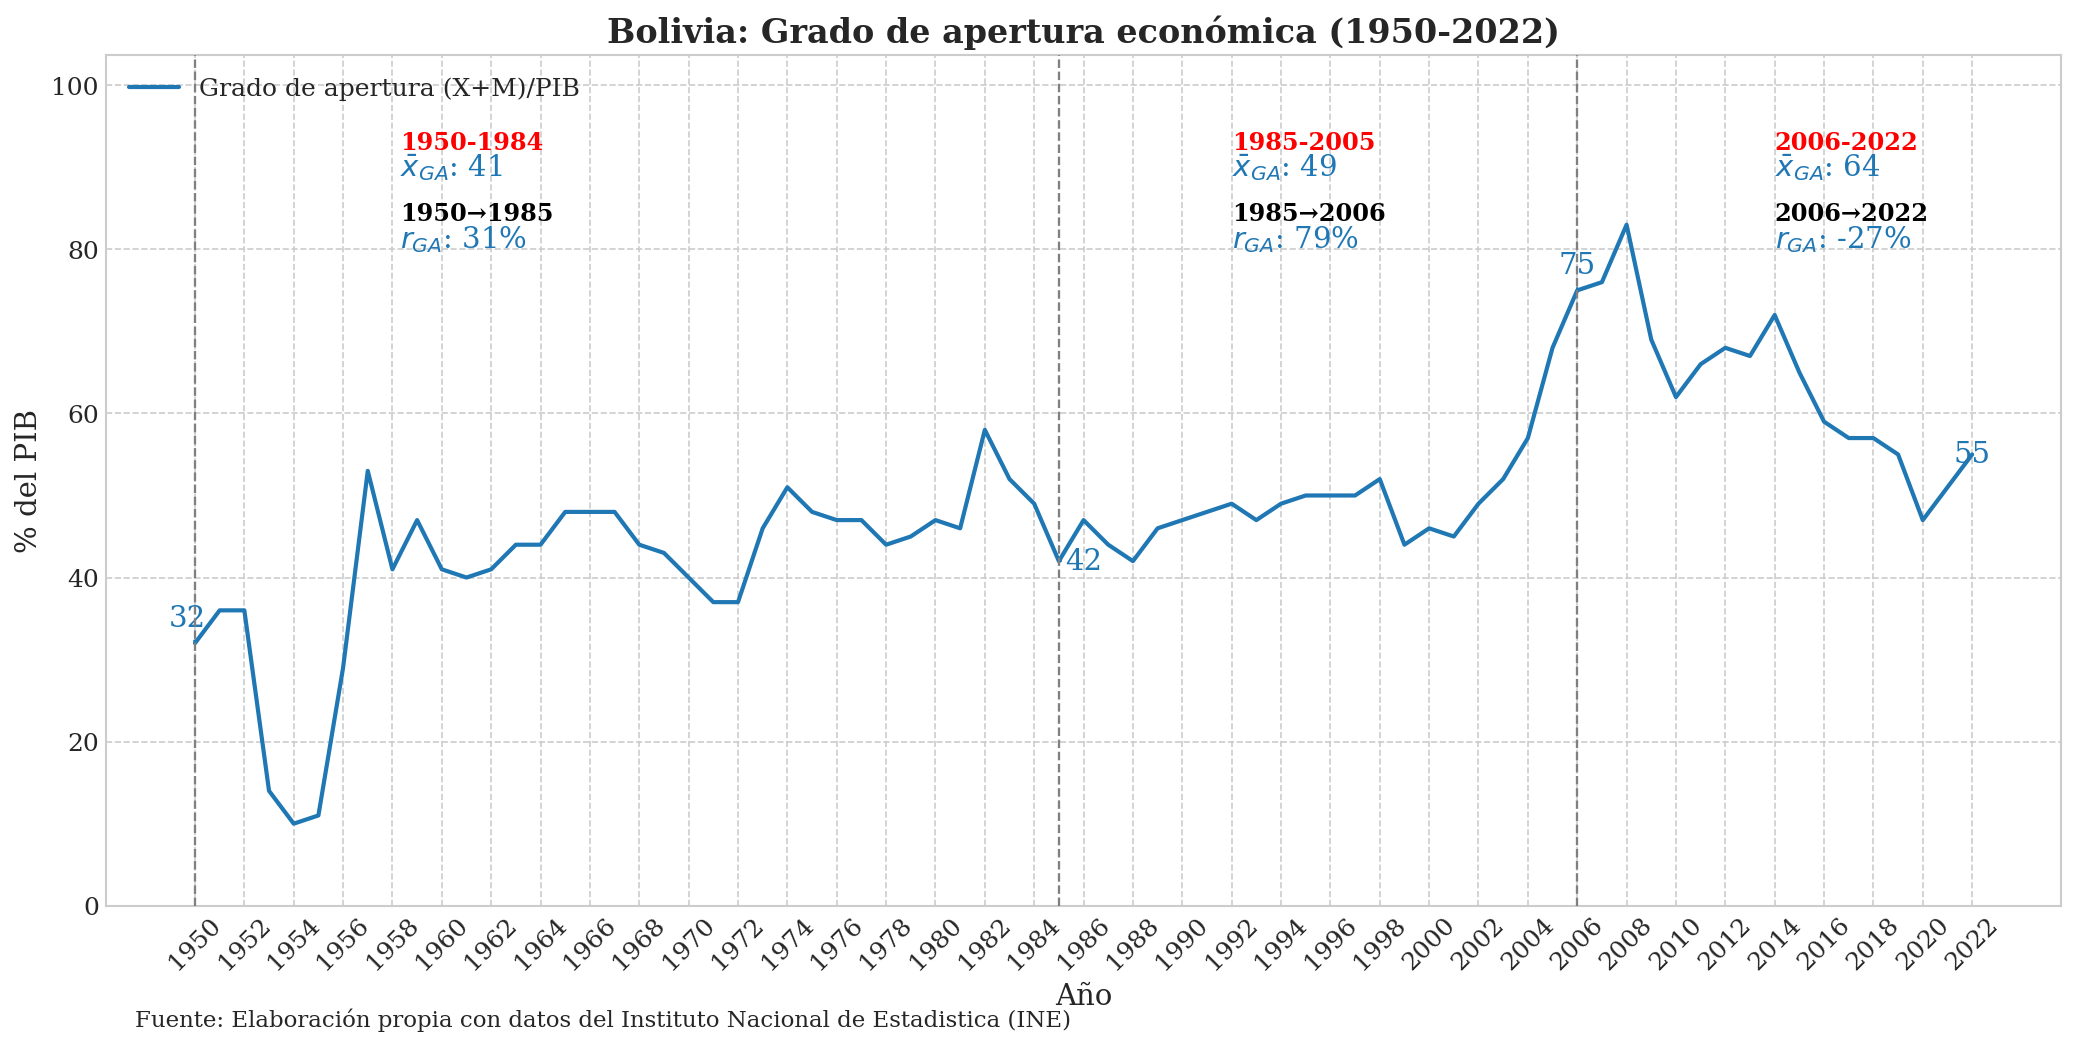

In [ ]:
# ── 0.  Tramos de ciclo (los mismos que usas en el resto de la tesis) ─────────
periods = {
    "1950-1984":   PERIODO_1,
    "1985-2005":   PERIODO_2,
    "2006-2022":   PERIODO_3,
}
# ── 3. Estadísticas por ciclo (medias) ───────────────────────────────────────
cycle_stats = {
    name: df.loc[period].mean().to_dict()
    for name, period in periods.items()
}
component_colors = {
    'GA': '#1f77b4'
}

# ── 4. Líneas verticales de hitos (mismos años que el gráfico de PIB) ───────
hitos_v = {
    1950: "1950-1984",
    1985: "1985-2005",
    2006: "2006-2022",
}
annotation_offsets = {
    "GA": {
        1950: (-0.3,  3.0),
        1985: ( 1.0,  0),
        2006: (0,  3.0),
    }
}

hitos_offset = {
    1950: 0.92, 1985: 0.50, 2006: 0.50,
}

tasas_offsets = {
    "1950-1985": (1958.3, 0.99),
    "1985-2006": (1992, 0.99),
    "2006-2022": (2014, 0.99),
}
means_offsets = {
    "1950-1984": (1958.3,  1.09),
    "1985-2005":  (1992, 1.09),
    "2006-2022": (2014, 1.09),
}
# ── 6. Graficar ──────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(14, 7))

# Serie principal
ax.plot(df.index, df['GA'], color='tab:blue', label='Grado de apertura (X+M)/PIB')
y_max = ax.get_ylim()[1]
add_hitos(ax, df.index, hitos_v, hitos_offset)
#anotaciones de tasas
periodos = [(1950,1985),(1985,2006),(2006,2022)]
anot_years = [1950,1985,2006,2022]
abbr_map = {
    "GA":"GA",
}
columnas=["GA"]
add_year_value_annotations(ax,df,anot_years,columnas,annotation_offsets,component_colors)
add_period_growth_annotations_multi(
    ax, df, periodos,
    columnas,
    tasas_offsets,
    component_colors,
    abbr_map,
)
add_cycle_means_multi(
    ax,
    cycle_stats,
    means_offsets,
    abbr_map,
    component_colors,
    line_spacing=y_max*0.03
)

# Etiquetas y formato
ax.set_title("Bolivia: Grado de apertura económica (1950-2022)", fontweight='bold')
ax.set_xlabel("Año")
ax.set_ylabel("% del PIB")
ax.set_ylim(0, df['GA'].max()*1.25)
ax.set_xticks(range(1950, 2023, 2))
ax.tick_params(axis='x', rotation=45)
ax.legend(loc='upper left')

fig.text(0.07, 0.01,
         "Fuente: Elaboración propia con datos del Instituto Nacional de Estadistica (INE)",
         ha='left', fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "grado_de_apertura_2.png"))
plt.show()